<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [55]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<class 'ModuleNotFoundError'>: No module named 'patsy'

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


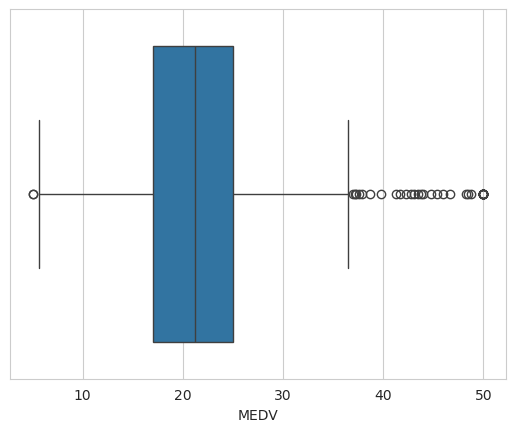

In [23]:
# Box plot for median value of owner-occupied homes
sns.set_style("whitegrid")
ax = sns.boxplot(x = "MEDV", data=boston_df)

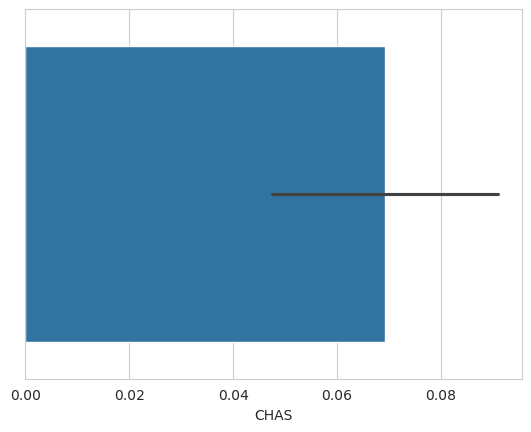

In [26]:
# Bar plot for Charles River variable
plt = sns.barplot(x = "CHAS", data = boston_df)

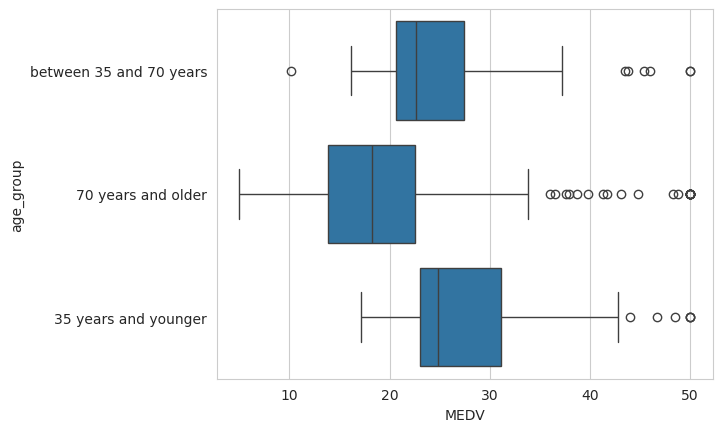

In [29]:
# boxplot for MEDV variable vs AGE variable
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

plt = sns.boxplot(x = "MEDV", y = "age_group", data = boston_df)

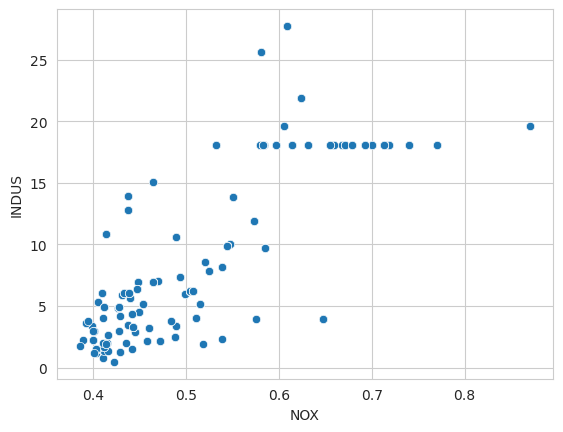

In [30]:
# Scatter plot for NOX concentration and non-retail business acres
plt = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)

# We can see that there is somewhat of a positive linear relationship between NOX concentration and
# non-retail business acres, with data skewed towards lower values of both.

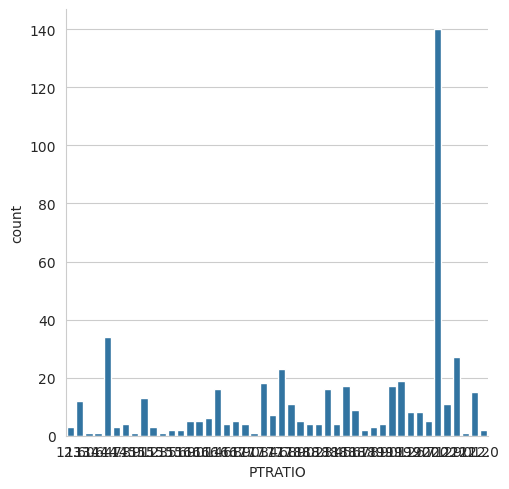

In [28]:
# Histogram for pupil-to-teacher ratio
sns.catplot(x = "PTRATIO", kind = "count", data = boston_df)

In [38]:
# Is there a significant difference in median value of houses bounded by the Charles river or not?
# (T-test for independent samples, a = 0.05)
# Hypothesis: Houses bounded by the Charles River are significantly higher in value.

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center = 'mean')
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

# Conclusion: We have insufficient evidence to reject the null hypothesis, because the p-value is > 0.05

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [43]:
#Is there a difference in Median values of houses for each proportion of owner occupied units built 
# prior to 1940? (ANOVA, a = 0.05)
# Hypothesis: Median values of houses will differ for owner-occupied units built before or after 1940.

under_35 = boston_df.loc[boston_df['age_group'] == '35 years and younger']['MEDV']
between_35_70 = boston_df.loc[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
above_70 = boston_df.loc[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(under_35, between_35_70, above_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# Conclusion: p < 0.05, so we have sufficient evidence to reject the null hypothesis and state that
# home values differ based on whether the home was built before or after 1940.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [50]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of 
# non-retail business acres per town? (Pearson Correlation, a = 0.05)
# Hypothesis (null): There is no relationship between Nitric Oxide concentrations and concentration
# of non-retail businesses

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Conclusion: p < 0.05, so we can reject our (null) hypothesis and state that there is indeed a 
# positive relationship between Nitric Oxide concentrations and density of non-retail businesses.

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [57]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the 
# median value of owner occupied homes? (Regression analysis, a = 0.05)
# Hypothesis: additional distance to employment centers will have a negative effect on median home value

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(X,y).fit()
predictions = model.predict(X)

model.summary()

# Conclusion: I ran into an error importing statsmodel. There's some dependency "Patsy" which is not
# importing properly (

<class 'NameError'>: name 'sm' is not defined